In [1]:
#učitavanje biblioteka koje su potrebne za rad 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from scipy import stats
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report
, f1_score
from sklearn import datasets
import seaborn as sn
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler, StandardScaler



In [70]:
#učitavamo processed bazu
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataframe = pd.read_csv('data_processed.csv')
print(dataframe)

        max    std  range  z_cros  label
0       281  95.98    510      23      4
1      1716 473.17   2229       8      1
2       126  44.31    206      12      5
3       105  15.97     83       0      5
4       103  38.80    181      30      5
...     ...    ...    ...     ...    ...
11495    79  38.38    152       8      2
11496   471 163.54    859      11      1
11497   121  44.29    211      27      5
11498   157  63.61    305       9      3
11499   110  49.61    218      22      4

[11500 rows x 5 columns]


In [71]:
#učitavamo čitavu biblioteku raw signala
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataframe_raw = pd.read_csv('data.csv')
print(dataframe_raw)

       Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176  X177  X178  y  
0       -15   -3

In [72]:
# Proveravamo koliko imamo nedostajucih obelezja i koji procenat to cini
total = dataframe.isnull().sum().sort_values(ascending=False)
percent = (dataframe.isnull().sum()/len(dataframe)).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)
#Primećujemo da nemamo nedostjauće podatke u bazi procesuiranih podataka


        Total  Percent
max         0     0.00
std         0     0.00
range       0     0.00
z_cros      0     0.00
label       0     0.00


In [73]:
# Proveravamo koliko imamo nedostajucih obelezja i koji procenat to cini
total = dataframe_raw.isnull().sum().sort_values(ascending=False)
percent = (dataframe_raw.isnull().sum()/len(dataframe_raw)).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)
#Primećujemo da nemamo nedostjauće podatke u bazi raw podataka

            Total  Percent
Unnamed: 0      0     0.00
X113            0     0.00
X115            0     0.00
X116            0     0.00
X117            0     0.00
...           ...      ...
X61             0     0.00
X62             0     0.00
X63             0     0.00
X64             0     0.00
y               0     0.00

[180 rows x 2 columns]


In [74]:
df2 = dataframe_raw.drop('Unnamed: 0', axis=1)
#ovo su izgleda šifre koje mi smetaju u prikazu te ću ih izbaciti

Broj uzoraka u kom se nije dogodio napad: 9200
Broj uzoraka u kom se  dogodio napad: 2300


C:\Users\Svetlana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


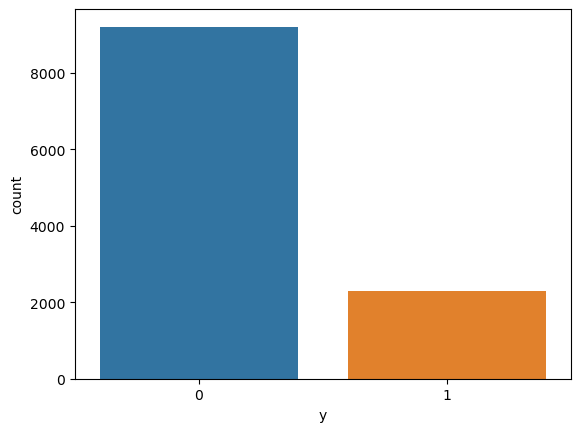

In [75]:
kolone = df2.columns
stanje = df2.y
stanje[stanje>1]=0 #svako stanje koje nije epilepsija stavljam na 0

#crtam grafikon seabornom, obican brojac
count = sn.countplot(stanje,label="ukupno")
bez_napada, napad = stanje.value_counts()
print('Broj uzoraka u kom se nije dogodio napad:', bez_napada)
print('Broj uzoraka u kom se  dogodio napad:', napad)

Analiza podataka

In [77]:
dataframe.describe() #funkciom describe vidimo statističke osobine parametara

,max,std,range,z_cros,label
count,11500.00,11500.00,11500.00,11500.00,11500.00
mean,289.33,101.92,471.01,14.56,3.00
std,356.05,125.62,577.35,7.47,1.41
min,30.00,10.71,49.00,0.00,1.00
25%,108.00,36.55,172.00,9.00,2.00
50%,151.00,51.05,243.00,14.00,3.00
75%,252.00,90.31,422.25,20.00,4.00
max,2047.00,810.40,3696.00,50.00,5.00


In [10]:
df_klasa = dataframe.set_index('label')
df_klasa.head()


,max,std,range,z_cros
label,,,,
4,281,95.98,510,23
1,1716,473.17,2229,8
5,126,44.31,206,12
5,105,15.97,83,0
5,103,38.80,181,30


([<matplotlib.axis.XTick at 0x1d9f9bea220>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

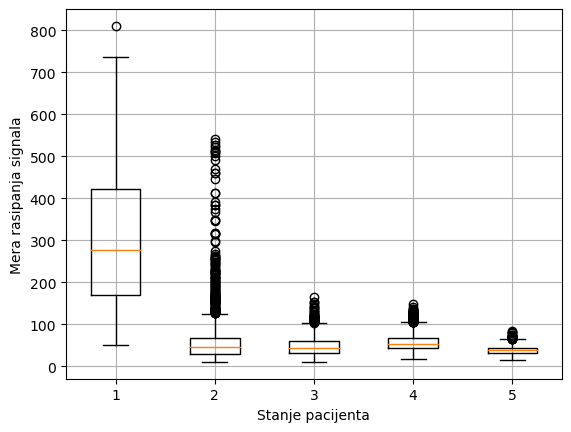

In [78]:
plt.boxplot([df_klasa.loc[1,'std'], df_klasa.loc[2,'std'], df_klasa.loc[3,'std'], df_klasa.loc[4,'std'],df_klasa.loc[5,'std']])
plt.xlabel('Stanje pacijenta')
plt.ylabel('Mera rasipanja signala')
plt.grid()
plt.xticks([1,2,3,4,5],['1','2','3','4','5'])

In [79]:
X = dataframe_raw.iloc[:,1:179].values
X.shape
print(X)

[[ 135  190  229 ... -116  -83  -51]
 [ 386  382  356 ...  154  143  129]
 [ -32  -39  -47 ...  -35  -35  -36]
 ...
 [  14    6  -13 ...   -2   -1   -8]
 [ -40  -25   -9 ...   68   59   55]
 [  29   41   57 ...   -2    2   20]]


Text(0.5, 0, 'Uzorak')

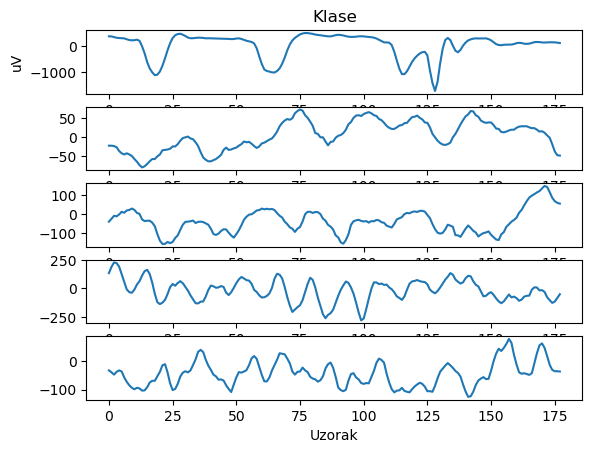

In [80]:
#Sad ću da pomoću baze koja sadrži raw signale da prikažem iste.
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Klase')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[11495,:])
plt.subplot(513)
plt.plot(X[11498,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Uzorak')

#iscrtavamo redove iz matrice ( videli smo na kojim lokacijama se taj sekund nalazi)

C:\Users\Svetlana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Svetlana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Svetlana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

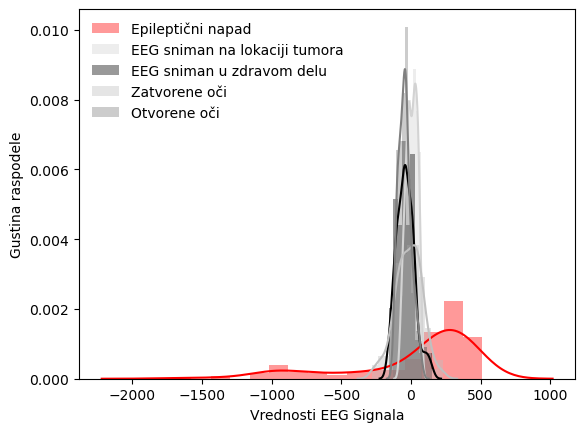

In [81]:
fig, ax = plt.subplots()

sn.distplot(X[1,:], color='red', label='Epileptični napad')
sn.distplot(X[11495,:], color='lightgrey', label='EEG sniman na lokaciji tumora')
sn.distplot(X[11498,:], color='black', label='EEG sniman u zdravom delu')
sn.distplot(X[0,:], color='silver', label='Zatvorene oči')
sn.distplot(X[2,:], color='gray', label='Otvorene oči')


plt.xlabel('Vrednosti EEG Signala'), plt.ylabel('Gustina raspodele')
leg = ax.legend(frameon=False)

<bound method Axes.plot of <AxesSubplot:xlabel='label', ylabel='max'>>

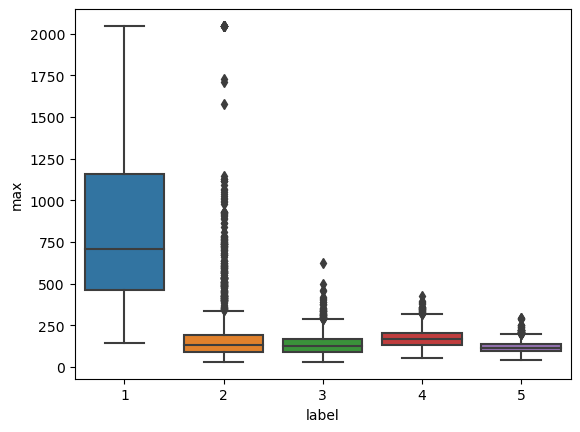

In [18]:
fig = sns.boxplot(x='label',y='max', data = dataframe)
#fig.axis(ymin=0,ymax=2000)
fig.plot

Odrađujemo Algoritme klasifikacije

In [101]:
def labela_napad(value):
    #converted_num = int(direction)

    if value==1:
            return '1'
    else:
            return '0'


In [102]:
dataframe['Doslo do napada'] = dataframe['label'].apply(labela_napad)

In [103]:
y = dataframe.iloc[:,-1]
X = dataframe.iloc[:,:-2]
print(y)
#u y smeštamo klase, a u X smeštamo obeležja , ona su prva četri te tako i stavljamo

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: Doslo do napada, Length: 11500, dtype: object


In [104]:
#u y smeštamo klase, a u X smeštamo obeležja , ona su prva četri te tako i stavljamo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("obuka shape: {}".format(X_train.shape))
print("test shape: {}".format(y_train.shape))
print("test shape: {}".format(X_test.shape))
print(y)



obuka shape: (9200, 4)
test shape: (9200,)
test shape: (2300, 4)
0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: Doslo do napada, Length: 11500, dtype: object


SVM

In [45]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for c in [1, 10, 20, 30, 40, 50]:
    for F in ['linear', 'rbf', 'poly']:
            indexes = kf.split(X, y)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
            for train_index, test_index in indexes:
                classifier = SVC(C=c, kernel=F)
                classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
                y_pred = classifier.predict(X.iloc[test_index,:])
                acc_tmp.append(accuracy_score(y.iloc[test_index], y_pred))
                fin_conf_mat += confusion_matrix(y.iloc[test_index], y_pred)
            print('za parametre C=', c, ', kernel=', F, ' tacnost je: ', np.mean(acc_tmp),
                  ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))



za parametre C= 1 , kernel= linear  tacnost je:  0.9595652173913045  a mat. konf. je:
[[9055.  145.]
 [ 320. 1980.]]
za parametre C= 1 , kernel= rbf  tacnost je:  0.9618260869565216  a mat. konf. je:
[[8969.  231.]
 [ 208. 2092.]]
za parametre C= 1 , kernel= poly  tacnost je:  0.952  a mat. konf. je:
[[9138.   62.]
 [ 490. 1810.]]
za parametre C= 10 , kernel= linear  tacnost je:  0.9595652173913043  a mat. konf. je:
[[8973.  227.]
 [ 238. 2062.]]
za parametre C= 10 , kernel= rbf  tacnost je:  0.964608695652174  a mat. konf. je:
[[9003.  197.]
 [ 210. 2090.]]
za parametre C= 10 , kernel= poly  tacnost je:  0.9520000000000002  a mat. konf. je:
[[9141.   59.]
 [ 493. 1807.]]
za parametre C= 20 , kernel= linear  tacnost je:  0.9595652173913043  a mat. konf. je:
[[8962.  238.]
 [ 227. 2073.]]
za parametre C= 20 , kernel= rbf  tacnost je:  0.9651304347826087  a mat. konf. je:
[[9004.  196.]
 [ 205. 2095.]]
za parametre C= 20 , kernel= poly  tacnost je:  0.952695652173913  a mat. konf. je:
[[

KNN Klasifikacija

C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 1  i m = manhattan  tacnost je:  0.9596521739130435  a mat. konf. je:
[[8949.  251.]
 [ 213. 2087.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 1  i m = minkowski  tacnost je:  0.9581739130434782  a mat. konf. je:
[[8957.  243.]
 [ 238. 2062.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 2  i m = manhattan  tacnost je:  0.96  a mat. konf. je:
[[9076.  124.]
 [ 336. 1964.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 2  i m = minkowski  tacnost je:  0.9577391304347825  a mat. konf. je:
[[9065.  135.]
 [ 351. 1949.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 3  i m = manhattan  tacnost je:  0.9666086956521738  a mat. konf. je:
[[8994.  206.]
 [ 178. 2122.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 3  i m = minkowski  tacnost je:  0.9637391304347827  a mat. konf. je:
[[8973.  227.]
 [ 190. 2110.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 4  i m = manhattan  tacnost je:  0.9654782608695651  a mat. konf. je:
[[9043.  157.]
 [ 240. 2060.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 4  i m = minkowski  tacnost je:  0.9628695652173912  a mat. konf. je:
[[9031.  169.]
 [ 258. 2042.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 5  i m = manhattan  tacnost je:  0.9677391304347825  a mat. konf. je:
[[9000.  200.]
 [ 171. 2129.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 5  i m = minkowski  tacnost je:  0.9641739130434782  a mat. konf. je:
[[8984.  216.]
 [ 196. 2104.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 6  i m = manhattan  tacnost je:  0.9661739130434782  a mat. konf. je:
[[9025.  175.]
 [ 214. 2086.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 6  i m = minkowski  tacnost je:  0.9636521739130435  a mat. konf. je:
[[9015.  185.]
 [ 233. 2067.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 7  i m = manhattan  tacnost je:  0.9686956521739128  a mat. konf. je:
[[9011.  189.]
 [ 171. 2129.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 7  i m = minkowski  tacnost je:  0.9650434782608694  a mat. konf. je:
[[8989.  211.]
 [ 191. 2109.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 8  i m = manhattan  tacnost je:  0.9675652173913043  a mat. konf. je:
[[9029.  171.]
 [ 202. 2098.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 8  i m = minkowski  tacnost je:  0.9650434782608694  a mat. konf. je:
[[9018.  182.]
 [ 220. 2080.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 9  i m = manhattan  tacnost je:  0.9678260869565218  a mat. konf. je:
[[9009.  191.]
 [ 179. 2121.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 9  i m = minkowski  tacnost je:  0.965391304347826  a mat. konf. je:
[[8994.  206.]
 [ 192. 2108.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 10  i m = manhattan  tacnost je:  0.9677391304347827  a mat. konf. je:
[[9028.  172.]
 [ 199. 2101.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

za parametre k= 10  i m = minkowski  tacnost je:  0.9658260869565218  a mat. konf. je:
[[9020.  180.]
 [ 213. 2087.]]


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

Text(0, 0.5, 'Accuracy')

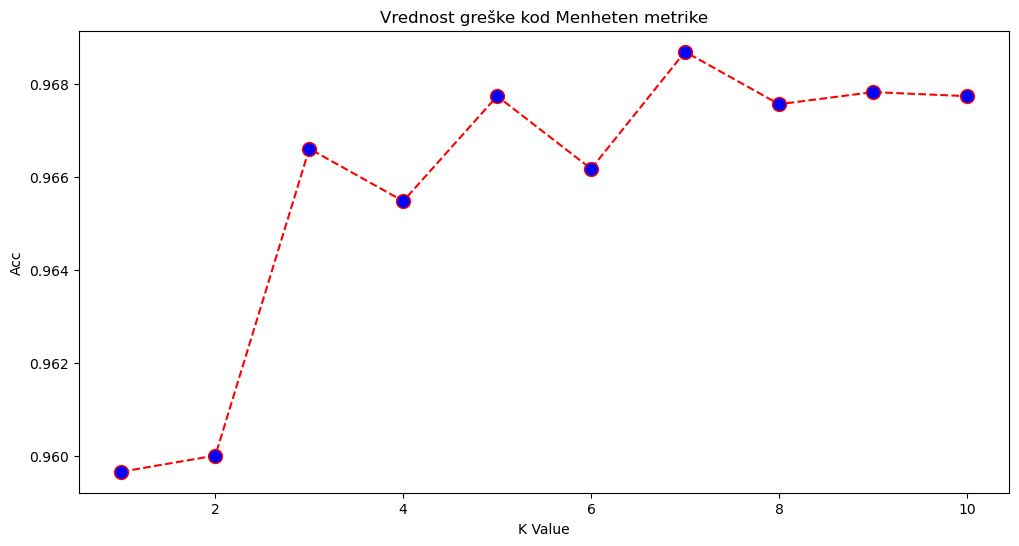

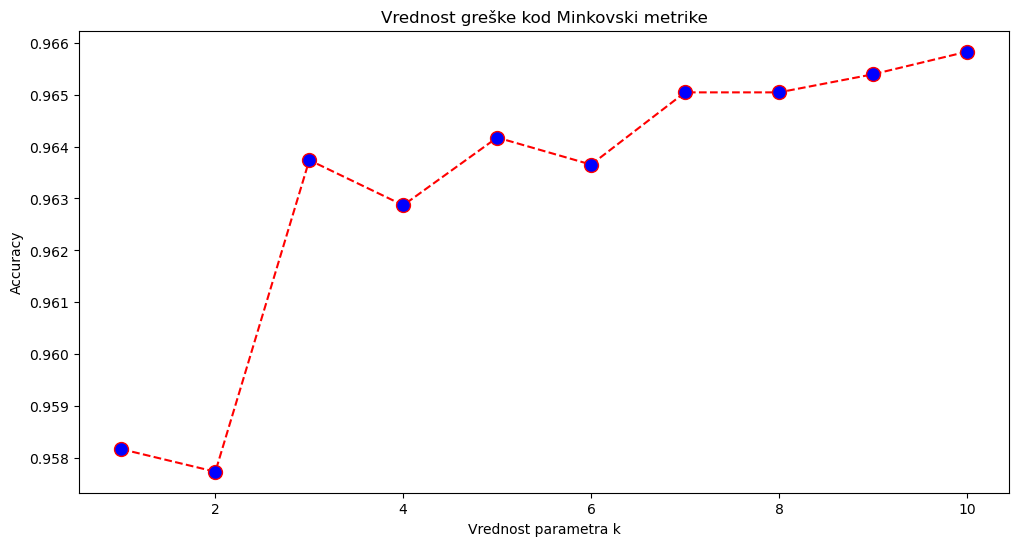

In [105]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
#generisanje listi u koje nadovezujem
acc = []
acc_manhattan = []
acc_minkowski = []
#testiram na k=10 i euklidskoj kao klasicnoj metrici i hamingovoj 
for k in range(1, 11):
    for m in ['manhattan','minkowski']:
        #indeksi koji se uzimaju unutar podeljenih podskupova
        indexes = kf.split(X, y)
        acc_tmp = []
        fin_conf_mat = np.zeros((len(np.unique(y)),len(np.unique(y))))
        #kreiram cross valid
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X.iloc[train_index,:], y.iloc[train_index])
            y_pred = classifier.predict(X.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y.iloc[test_index], y_pred))
            fin_conf_mat += confusion_matrix(y.iloc[test_index], y_pred)
        print('za parametre k=', k, ' i m =', m, ' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
        print(fin_conf_mat)
        acc.append(np.mean(acc_tmp))
        if(m == 'manhattan'):
            acc_manhattan.append(np.mean(acc_tmp))
        if(m == 'minkowski'):
            acc_minkowski.append(np.mean(acc_tmp))

            
plt.figure(figsize=(12, 6))
plt.plot(range(1,11), acc_manhattan, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Vrednost greške kod Menheten metrike')
plt.xlabel('K Value')
plt.ylabel('Acc')

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), acc_minkowski, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Vrednost greške kod Minkovski metrike')
plt.xlabel('Vrednost parametra k')
plt.ylabel('Accuracy')





In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

Logistička regresija

In [146]:
# podela podataka na skup za obuku, validaciju i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10, stratify=y_train)

In [147]:
recall = []
for num in [100, 200, 500, 1000,2000]:
    for solv in ['liblinear', 'newton-cg', 'lbfgs', 'saga']:
        classifier = LogisticRegression(max_iter=num, solver=solv)
        classifier.fit(X_train_1, y_train_1)
        y_pred = classifier.predict(X_val)  
        rec = recall_score(y_val, y_pred, pos_label = '1')
        recall.append(rec)
        print(f"Za parametre max_iter={num} i solver={solv}, Osetljivost je {rec:.4f}, a tačnost je {accuracy_score(y_val, y_pred):.4f}.")


Za parametre max_iter=100 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9575.
Za parametre max_iter=100 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=100 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=100 i solver=saga, Osetljivost je 0.8164, a tačnost je 0.9256.


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Za parametre max_iter=200 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9575.
Za parametre max_iter=200 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=200 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9585.


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Za parametre max_iter=200 i solver=saga, Osetljivost je 0.8164, a tačnost je 0.9275.
Za parametre max_iter=500 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9575.
Za parametre max_iter=500 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=500 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9585.


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Za parametre max_iter=500 i solver=saga, Osetljivost je 0.8213, a tačnost je 0.9295.
Za parametre max_iter=1000 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9575.
Za parametre max_iter=1000 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=1000 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=1000 i solver=saga, Osetljivost je 0.8261, a tačnost je 0.9314.
Za parametre max_iter=2000 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9575.
Za parametre max_iter=2000 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=2000 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9585.
Za parametre max_iter=2000 i solver=saga, Osetljivost je 0.8261, a tačnost je 0.9314.


In [148]:
from sklearn.decomposition import PCA

In [ ]:
REDUKCIJA DIMENZIONALNOSTI PCA METODOM

In [149]:
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_test_std = s.transform(X_test)


In [150]:
pca = PCA(n_components = 0.9)
pca.fit(X_train_std)
pca.fit(X_test_std)
X_train_r = pca.transform(X_train_std)
X_test_r = pca.transform(X_test_std)


PONAVLJANJE MODELA 

In [151]:
svm = SVC(C=50, kernel='rbf')

# Train SVM klasifikatora 
svm.fit(X_train_r, y_train)

# Koristi SVM klasifikator za predviđanje klasa na X_test_r skupu podataka
y_pred = svm.predict(X_test_r)

# Ispiši tačnost SVM klasifikacije na X_test_r skupu podataka
accuracy = svm.score(X_test_r, y_test)
print("Tačnost SVM klasifikacije s C=50 i RBF kernelom: {:.2f}".format(accuracy*100), "%")


Tačnost SVM klasifikacije s C=50 i RBF kernelom: 97.48 %


In [152]:

knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan')

# Trejn KNN klasifikator na X_train_r skupu podataka
knn.fit(X_train_r, y_train)

# Koristi KNN klasifikator za predviđanje klasa na X_test_r skupu podataka
y_pred = knn.predict(X_test_r)

accuracy = knn.score(X_test_r, y_test)
print("Tačnost KNN klasifikacije s 9 susjeda i metrikom Manhattan: {:.2f}".format(accuracy*100))


Tačnost KNN klasifikacije s 9 susjeda i metrikom Manhattan: 97.04


C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [153]:
# podela podataka na skup za obuku, validaciju i test
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X2, y2, test_size=0.1, random_state=10, stratify=y)
X_train_1R, X_valR, y_train_1R, y_valR = train_test_split(X_trainR, y_trainR, test_size=0.1, random_state=10, stratify=y_train)

In [154]:
from sklearn.metrics import precision_score

precisions = []
for num in [100]:
    for solv in ['liblinear']:
        classifier = LogisticRegression(max_iter=num, solver=solv)
        classifier.fit(X_train_1R, y_train_1R)
        y_predR = classifier.predict(X_valR)  
        precR = precision_score(y_valR, y_predR, pos_label='1')
        precisions.append(precR)
        print(f"Za parametre max_iter={num} i solver={solv}, Preciznost je {precR:.4f}, a tačnost je {accuracy_score(y_valR, y_predR):.4f}.")


Za parametre max_iter=100 i solver=liblinear, Preciznost je 0.9623, a tačnost je 0.9517.


In [155]:
recall = []
for num in [100, 200, 500, 1000]:
    for solv in ['liblinear', 'newton-cg', 'lbfgs', 'saga']:
        classcifier = LogisticRegression(max_iter=num, solver=solv)
        classifier.fit(X_train_1R, y_train_1R)
        y_predR = classifier.predict(X_valR)  
        recR = recall_score(y_valR, y_predR, pos_label = '1')
        recall.append(recR)
        print(f"Za parametre max_iter={num} i solver={solv}, Osetljivost je {rec:.4f}, a tačnost je {accuracy_score(y_valR, y_predR):.4f}.")


Za parametre max_iter=100 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=100 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=100 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=100 i solver=saga, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=200 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=200 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=200 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=200 i solver=saga, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=500 i solver=liblinear, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=500 i solver=newton-cg, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=500 i solver=lbfgs, Osetljivost je 0.8261, a tačnost je 0.9517.
Za parametre max_iter=500 i solv

In [156]:
def labela_napad(value):
    #converted_num = int(direction)

    if value==1:
            return '1'
    else:
            return '0'
dataframe['Doslo do napada'] = dataframe['label'].apply(labela_napad)

In [ ]:
EVALUACIJA NAJBOLJih MODELA 

In [157]:

y = dataframe.iloc[:,-1]
X = dataframe.iloc[:,:-2]
#u y smeštamo klase, a u X smeštamo obeležja , ona su prva četri te tako i stavljamo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matrica konfuzije:\n", cm)

report = classification_report(y_test, y_pred)
print("Izveštaj klasifikacije:\n", report)

Matrica konfuzije:
 [[1823   31]
 [  37  409]]
Izveštaj klasifikacije:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1854
           1       0.93      0.92      0.92       446

    accuracy                           0.97      2300
   macro avg       0.95      0.95      0.95      2300
weighted avg       0.97      0.97      0.97      2300



In [173]:

y = dataframe.iloc[:,-1]
X = dataframe.iloc[:,:-2]
#u y smeštamo klase, a u X smeštamo obeležja , ona su prva četri te tako i stavljamo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matrica konfuzije:\n", cm)

report = classification_report(y_test, y_pred)
print("Izveštaj klasifikacije:\n", report)

Matrica konfuzije:
 [[1820   36]
 [  34  410]]
Izveštaj klasifikacije:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1856
           1       0.92      0.92      0.92       444

    accuracy                           0.97      2300
   macro avg       0.95      0.95      0.95      2300
weighted avg       0.97      0.97      0.97      2300



C:\Users\Svetlana\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
